# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** K

**Names:**

*  Xavier Jeanmonod
*  Adrian Baudat
*  Simon Wicky

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

with open("../data/absorbing.graph", "rb") as f:
    absorbing = nx.read_adjlist(f, create_using=nx.DiGraph())
    
with open("../data/components.graph", "rb") as f:
    components = nx.read_adjlist(f, create_using=nx.DiGraph())
    
with open("../data/wikipedia.graph", "rb") as f:
    wikipedia = nx.read_adjlist(f, create_using=nx.DiGraph())

First let's visualize the two graphs:

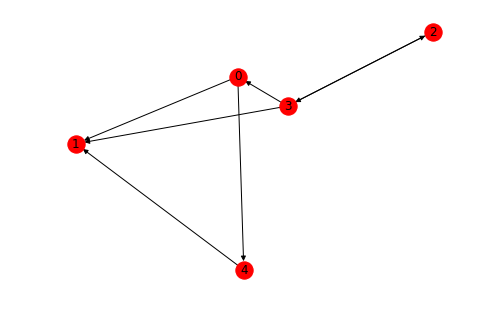

In [2]:
nx.draw(absorbing, arrows = True, with_labels = True)

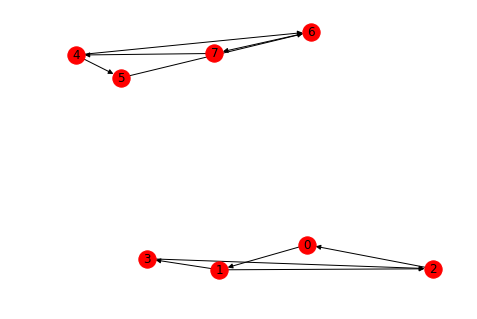

In [3]:
nx.draw(components, arrows = True, with_labels = True)

In [14]:
import random

def random_surf(graph, iterations):
    nx.set_node_attributes(graph, 0, name="rank")
    nodes = graph.nodes
    current_node = random.choice(list(nodes))
    for i in range(iterations):
        graph.node[current_node]['rank'] += 1
        out_edges = graph.out_edges(current_node)
        if len(out_edges) == 0:
            print("Terminated early because node has no outgoing edge")
            return
        else:
            current_node = random.choice(list(out_edges))[1]

def rank_colors(graph):
    node_color = []
    max_rank = 0
    for node in graph.nodes(data=True):
        if node[1]['rank'] > max_rank:
            max_rank = node[1]['rank']
            
    for node in graph.nodes(data=True):
        node_rank = node[1]['rank']
        if node_rank == 0:
            node_color.append([0.2,0.2,0.2])
        else:
            color = 0.8*(node_rank/max_rank)
            node_color.append([color,color,color])
    return node_color

Now let's run the random surf algorithm on the two graphs. The brighter the node, the higher the rank.

Terminated early because node has no outgoing edge


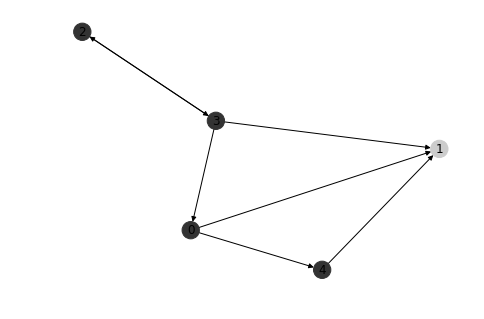

In [25]:
random_surf(absorbing, 1000)
colors = rank_colors(absorbing)
nx.draw(absorbing, arrows = True, with_labels = True, node_color = colors)

As we can see, on the absorbing graph the algorithm gets stuck in node 1 as it has many edges pointing to it and no edge going out of it.

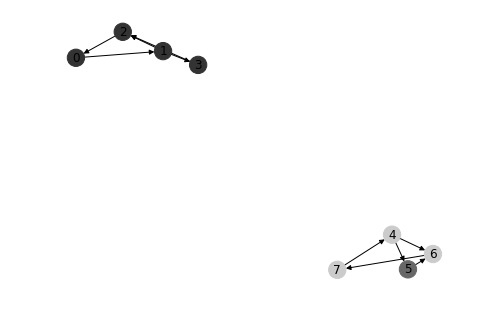

In [24]:
random_surf(components, 1000)
colors = rank_colors(components)
nx.draw(components, arrows = True, with_labels = True, node_color = colors)

On the components graph, another problem happens: Since the graph is split in two different components, only one of the components is visited. However, as the component has no dead end the algorithm doesn't stop, and yields high ranks for the nodes of the component that is visited and zero ranks for the nodes of the other component

#### Exercise 2.13

In [8]:
def pagerank_surf(graph, iterations, damping_factor = 0.15):
    nx.set_node_attributes(graph, 0, name="rank")
    nodes = graph.nodes
    current_node = random.choice(list(nodes))
    for i in range(iterations):
        graph.node[current_node]['rank'] += 1
        out_edges = graph.out_edges(current_node)
        if len(out_edges) == 0:
            current_node = random.choice(list(nodes))
        else:
            if random.uniform(0, 1) < damping_factor:
                current_node = random.choice(list(nodes))
            else:
                current_node = random.choice(list(out_edges))[1]

Let's run this version of the algorithm on the two graphs.

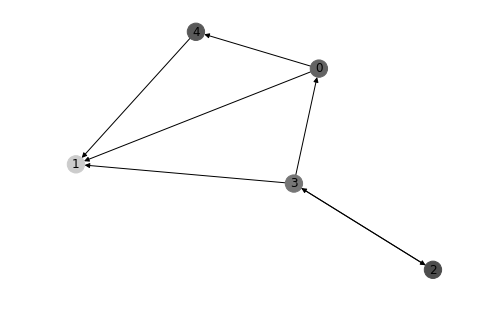

In [23]:
pagerank_surf(absorbing, 1000)
colors = rank_colors(absorbing)
nx.draw(absorbing, arrows = True, with_labels = True, node_color = colors)

The results we get here do make instinctive sense: The node 1, which is pointed to by 3 nodes is high ranked, while the other nodes, which are pointed to only by 1 node are lower ranked.

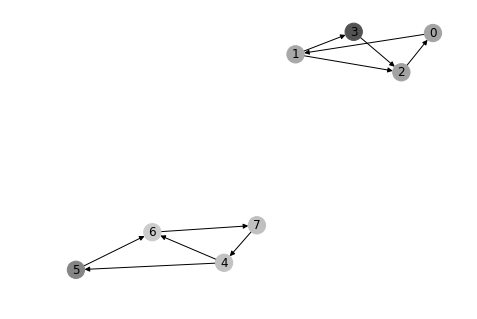

In [22]:
pagerank_surf(components, 1000)
colors = rank_colors(components)
nx.draw(components, arrows = True, with_labels = True, node_color = colors)

Once again, the results we obtain make sense: Nodes that are the only node being pointed to from a source, and nodes that have multiple nodes pointing to them are highly ranked, while the nodes that are only being pointe to by one node, and that are not the only node their source points to (5 and 3 in this case) have a low rank.

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

---

### 2.4.3 Gaming the system

#### Exercise 2.15